# 1. Importing libraries and defining dataset

In [1]:
# For capturing hamd coordinates
import cv2
import mediapipe as mp

# For processing damta
import pandas as pd
import numpy as np

In [3]:
# Reading the damtaset
dataset = pd.read_csv('hand_dataset.csv')

dataset.head(20)

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,A,0.530803,0.581163,0.413990,0.501149,0.355407,0.369223,0.345517,0.263534,0.354250,...,0.534037,0.476981,0.665000,0.338577,0.605741,0.320499,0.588447,0.400885,0.594126,0.455363
1,A,0.503664,0.616673,0.377512,0.536617,0.317852,0.408111,0.306450,0.296595,0.316670,...,0.494619,0.508490,0.635405,0.349954,0.561715,0.359349,0.546541,0.440563,0.551058,0.498263
2,A,0.267808,0.670679,0.187360,0.610215,0.141140,0.503103,0.133638,0.422246,0.138989,...,0.298920,0.586336,0.368706,0.504098,0.369881,0.461587,0.362212,0.517269,0.349507,0.565708
3,A,0.289091,0.751779,0.167962,0.654705,0.100007,0.499485,0.095107,0.371244,0.122449,...,0.294725,0.624627,0.457846,0.480413,0.393687,0.455553,0.365366,0.547497,0.356335,0.612805
4,A,0.285160,0.762803,0.161197,0.667723,0.094453,0.512100,0.090644,0.383932,0.113567,...,0.292644,0.635424,0.450271,0.489606,0.388296,0.466932,0.361084,0.560643,0.352804,0.623975
5,A,0.280310,0.770427,0.152314,0.678216,0.081021,0.524083,0.077630,0.399068,0.107794,...,0.284430,0.640549,0.445078,0.498075,0.379355,0.471122,0.355311,0.562981,0.350741,0.630216
6,A,0.274550,0.776984,0.151220,0.687646,0.080959,0.535343,0.072944,0.408230,0.101618,...,0.283215,0.646868,0.435993,0.506300,0.376239,0.480962,0.350880,0.574878,0.339769,0.644247
7,A,0.277456,0.783530,0.147582,0.689846,0.071741,0.539836,0.063596,0.414261,0.092673,...,0.283368,0.655386,0.431004,0.515131,0.374581,0.486279,0.349532,0.578436,0.339866,0.644906
8,A,0.280078,0.788368,0.150851,0.696469,0.073741,0.546784,0.062120,0.422311,0.088380,...,0.285535,0.660151,0.429204,0.522354,0.379037,0.487302,0.354566,0.578693,0.344249,0.646549
9,A,0.277945,0.787239,0.155729,0.704394,0.082830,0.554113,0.072586,0.429771,0.087657,...,0.283121,0.661055,0.431149,0.529704,0.383147,0.491124,0.354732,0.582953,0.346235,0.649655


In [4]:
# damtaset overview, should return 1000 for each alphabet
dataset['class'].value_counts()

A    1000
B    1000
Y    1000
X    1000
W    1000
V    1000
U    1000
T    1000
S    1000
R    1000
Q    1000
P    1000
O    1000
N    1000
M    1000
L    1000
K    1000
J    1000
I    1000
H    1000
G    1000
F    1000
E    1000
D    1000
C    1000
Z    1000
Name: class, dtype: int64

# 2. Creating Train and Test Data

In [5]:
# Defining X and Y from dataset for training and testing

X = dataset.iloc[:, 1:].values
X

array([[0.5308032 , 0.58116275, 0.4139902 , ..., 0.40088472, 0.59412593,
        0.45536327],
       [0.50366437, 0.61667281, 0.37751189, ..., 0.4405632 , 0.55105829,
        0.49826261],
       [0.26780751, 0.67067909, 0.18736038, ..., 0.51726931, 0.34950748,
        0.56570804],
       ...,
       [0.5923028 , 0.79763687, 0.46212453, ..., 0.58209801, 0.46417981,
        0.63919067],
       [0.58849472, 0.79634482, 0.45975158, ..., 0.57587278, 0.46483576,
        0.63999385],
       [0.59929621, 0.79213279, 0.46550113, ..., 0.56292117, 0.46786231,
        0.62495214]])

In [6]:
Y = dataset.iloc[:, 0].values
Y

array(['A', 'A', 'A', ..., 'Z', 'Z', 'Z'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split

# We will be taking 33% from 1000 for our test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [8]:
X_train, X_test, y_train, y_test

(array([[0.09376033, 0.57354999, 0.04851374, ..., 0.52799761, 0.17729978,
         0.54939461],
        [0.3908619 , 0.78482884, 0.45481557, ..., 0.8037402 , 0.66733056,
         0.83027363],
        [0.78564906, 0.56514978, 0.66061729, ..., 0.30955982, 0.75333643,
         0.38327295],
        ...,
        [0.51193839, 1.00262237, 0.36702013, ..., 0.68438125, 0.59991157,
         0.7624476 ],
        [0.44107139, 0.9730739 , 0.33565852, ..., 0.65560955, 0.23346326,
         0.69220376],
        [0.57235789, 0.84563804, 0.41627589, ..., 0.57341456, 0.63565063,
         0.65144718]]),
 array([[0.66074103, 0.96233374, 0.48618847, ..., 0.52618206, 0.94698608,
         0.49910456],
        [0.28905731, 0.68452442, 0.3286218 , ..., 0.6589666 , 0.6124289 ,
         0.67547494],
        [0.17195472, 0.68084526, 0.09653907, ..., 0.48385772, 0.4180066 ,
         0.44252354],
        ...,
        [0.2729224 , 0.82465565, 0.18711177, ..., 0.58708447, 0.40575361,
         0.54593933],
        [0.7

In [9]:
# Normalizing / Standarizing dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train,X_test

(array([[-2.05925304, -0.81070411, -2.11164125, ...,  0.06769914,
         -1.92204525,  0.05797985],
        [-0.42145452,  0.37056134,  0.40283987, ...,  1.601787  ,
          0.6231466 ,  1.4765412 ],
        [ 1.75484446, -0.85766985,  1.67648552, ..., -1.14757471,
          1.06985615, -0.78100687],
        ...,
        [ 0.24599031,  1.58825046, -0.14049997, ...,  0.93773606,
          0.27297621,  1.1339902 ],
        [-0.14467027,  1.42304423, -0.33458764, ...,  0.77766535,
         -1.63033538,  0.77922825],
        [ 0.57905812,  0.71054709,  0.16432927, ...,  0.32037536,
          0.45860286,  0.57338976]]),
 array([[ 1.06627795,  1.36299572,  0.59699744, ...,  0.05759833,
          2.07566136, -0.19600679],
        [-0.98266125, -0.19024325, -0.37813578, ...,  0.79634224,
          0.33799052,  0.69474043],
        [-1.6281996 , -0.2108135 , -1.81442681, ..., -0.17787218,
         -0.67182781, -0.48176558],
        ...,
        [-1.0716064 ,  0.59323404, -1.25389931, ...,  

# 3. Creating classifier model for our alphabet recognition.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# 4. Calculating model accuracy

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
y_pred

array(['Y', 'Q', 'Y', ..., 'Y', 'K', 'C'], dtype=object)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.98      0.99      0.98       347
           B       0.98      1.00      0.99       324
           C       1.00      1.00      1.00       336
           D       0.99      0.97      0.98       337
           E       1.00      0.97      0.98       327
           F       1.00      0.99      1.00       308
           G       0.98      1.00      0.99       314
           H       1.00      0.99      1.00       356
           I       1.00      0.99      0.99       348
           J       0.98      0.99      0.99       351
           K       0.99      0.99      0.99       319
           L       1.00      1.00      1.00       326
           M       0.94      0.96      0.95       323
           N       0.96      0.93      0.94       325
           O       0.97      0.99      0.98       317
           P       1.00      0.99      0.99       344
           Q       0.99      0.99      0.99       338
           R       0.97    

# 5. Show graph for adjusting number of *n_neighbors*

In [15]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [18]:
error

[0.012354312354312355,
 0.019696969696969695,
 0.022494172494172494,
 0.029603729603729603,
 0.03193473193473193,
 0.03787878787878788,
 0.04219114219114219,
 0.0479020979020979,
 0.051515151515151514]

Text(0, 0.5, 'Mean Error')

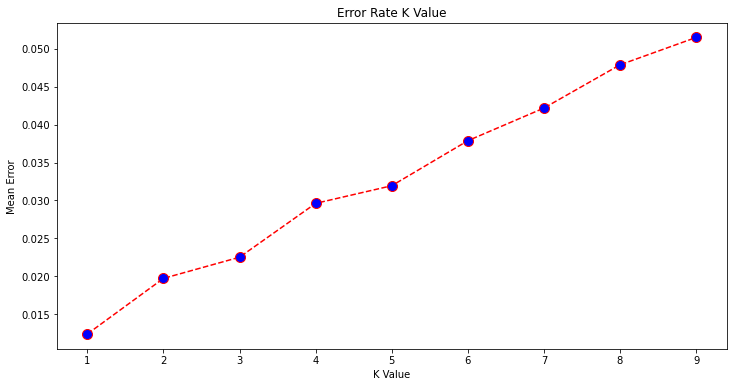

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
ls = [i for i in range(1,10)]

In [32]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=ls, y=error))
fig.update_layout(title='Error Rate K Value',
                   xaxis_title='K Value',
                   yaxis_title='Mean Error',height=900,width=1000)
fig.show()

# 6. Intializing Mediapipe Hands for alphabet recognition.

In [33]:
# Initializing mediapipe hand

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [34]:
hands = mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

In [40]:
# Initializing mediapipe hand capture webcam

cap = cv2.VideoCapture(0)


while cap.isOpened():
    success, image = cap.read()

    if not success:
        print("Ignoring empty camera frame.")
        continue

    # Flipping the image horizontally for a later selfie-view display, and converting
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

    # To improve performance, marking the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = hands.process(image)

    # Drawing the hand annotations on the image.
    
    # resetiing writeable is True
    image.flags.writeable = True
    
    #converting the BGR image to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            coords = hand_landmarks.landmark
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
            coords = scaler.transform([coords])

            predicted = classifier.predict(coords)

        # Defining the Status Box
        cv2.rectangle(image, (0,0), (160, 60), (245, 90, 16), -1)

        # Displaying Class
        cv2.putText(image, 'Predicted Letter'
                    , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(predicted[0])
                    , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Sign Translator', image)

    if cv2.waitKey(5) & 0xFF == 27:
        break
        
cap.release()
cv2.destroyAllWindows()
